In [1]:
from ml_recon.pl_modules.pl_varnet import pl_VarNet
import torch
import matplotlib.pyplot as plt

In [18]:
model = pl_VarNet.load_from_checkpoint("/home/brenden/Documents/code/python/mri_machine_learning_reconstruction/artifacts/model-eavr9y1o:v0/model.ckpt")
sc_model = pl_VarNet.load_from_checkpoint("artifacts/model-qz37jqqx:v0/model.ckpt")

No image space loss!!
No image space loss!!


In [20]:
Unets = model.model
sc_unets = sc_model.model

In [21]:
parameters = [pram for pram in Unets.cascades[0].model.down_sample_layers[0].layers[0].parameters()]
sc_param = [x for x in sc_unets.cascades[0].model.down_sample_layers[0].layers[0].parameters()]

In [5]:
parameters[0].shape

torch.Size([32, 6, 3, 3])

In [6]:
parameters = parameters[0].cpu()

In [22]:
sc_params = sc_param[0].cpu()

In [27]:
sc_params

tensor([[[[ 0.0369,  0.4006,  0.3590],
          [-0.0824,  0.0528,  0.0895],
          [ 0.2097, -0.3480, -0.0096]],

         [[-0.0727,  0.2159,  0.0834],
          [-0.0812, -0.1306, -0.1880],
          [ 0.0958,  0.0947, -0.0860]]],


        [[[-0.0957, -0.2690, -0.2209],
          [ 0.0189, -0.3243,  0.0968],
          [ 0.1981, -0.2076, -0.0706]],

         [[ 0.0370,  0.0863,  0.0257],
          [-0.1069, -0.0673, -0.1889],
          [ 0.0417,  0.0027,  0.1923]]],


        [[[ 0.0034,  0.1812, -0.2714],
          [-0.0991,  0.3169,  0.2128],
          [ 0.0493, -0.1871,  0.1510]],

         [[ 0.1083, -0.0641, -0.0092],
          [-0.0963,  0.0536, -0.0654],
          [ 0.0474,  0.0457,  0.0248]]],


        [[[ 0.0052, -0.1095, -0.0903],
          [ 0.0193, -0.3295, -0.4675],
          [-0.0387, -0.2496, -0.3568]],

         [[-0.0424,  0.0395, -0.1830],
          [ 0.0644,  0.1986, -0.0562],
          [-0.1570,  0.1126, -0.0087]]],


        [[[ 0.2300, -0.1031, -0.2446],
 

In [35]:
def plot_conv_weights(param):
    output_channels = param.shape[0]
    input_channels = param.shape[1]
    
    reshaped = param.permute(0, 2, 1, 3)


    image = reshaped.reshape(output_channels*3, input_channels*3)
# Convert to numpy for plotting
    image = image.detach().numpy()

# Plot the image
    fig, ax = plt.subplots(figsize=(12, 12))
    ax.imshow(image, cmap="gray")
    ax.set_xlabel("Features (6 × 3)")
    ax.set_ylabel("Dimensions (32 x 3)")
    ax.set_title("Tensor Visualization")

# Add grid lines to delineate kernels
    rows, cols = param.shape[:2]  # [32, 6]
    kernel_size = param.shape[2]  # 3x3 → 3

# Horizontal lines (between rows)
    for i in range(1, rows):
        ax.axhline(i * kernel_size - 0.5, color='red', linewidth=0.8)

# Vertical lines (between columns)
    for j in range(1, cols):
        ax.axvline(j * kernel_size - 0.5, color='red', linewidth=0.8)

    plt.colorbar(ax.imshow(image))
    plt.show()


In [30]:
sc_params.shape

torch.Size([18, 2, 3, 3])

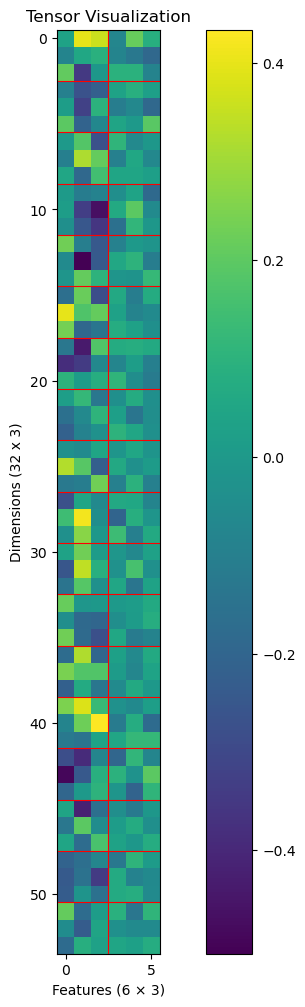

In [36]:
plot_conv_weights(sc_params)